In [1]:
import sys
from os import listdir
from os.path import isfile, join
import string

import numpy as np
from plot_utils import plot_solution
from plot_utils import plot_two_solutions
import matplotlib.pyplot as plt 

from ioutils import parse_input
from ioutils import parse_solutions
from utils import get_distance_matrix
from utils import get_discount_matrix
from utils import get_nodes
from utils import allocate_paths
from utils import get_flow_from_paths
from utils import bitmap
from utils import plot_comparison_with_optimal

In [2]:
DATASET = 'AP'
INPUT_DIRECTORY = f"./data/{DATASET}/generated/"

In [3]:
files = [join(INPUT_DIRECTORY, f) for f in listdir(INPUT_DIRECTORY) if isfile(join(INPUT_DIRECTORY, f))]
print(files)
file = files[1]
print(file)

['./data/AP/generated/40.5', './data/AP/generated/10.3', './data/AP/generated/25.10', './data/AP/generated/50.8', './data/AP/generated/25.8', './data/AP/generated/100.8', './data/AP/generated/100.10', './data/AP/generated/200.8', './data/AP/generated/100.4', './data/AP/generated/20.8', './data/AP/generated/50.4', './data/AP/generated/20.3', './data/AP/generated/20.2', './data/AP/generated/40.8', './data/AP/generated/200.2', './data/AP/generated/10.8', './data/AP/generated/50.3', './data/AP/generated/200.5', './data/AP/generated/25.5', './data/AP/generated/10.2', './data/AP/generated/200.4', './data/AP/generated/40.10', './data/AP/generated/50.2', './data/AP/generated/100.2', './data/AP/generated/200.10', './data/AP/generated/40.2', './data/AP/generated/20.4', './data/AP/generated/40.4', './data/AP/generated/25.2', './data/AP/generated/50.5', './data/AP/generated/25.3', './data/AP/generated/10.5', './data/AP/generated/100.3', './data/AP/generated/200.3', './data/AP/generated/100.5', './

In [4]:
n, p, alpha, delta, ksi, nodes_coordinates, demand = parse_input(file, DATASET)
distances = get_distance_matrix(nodes_coordinates)

In [5]:
# distances

In [6]:
from vns import get_initial_solution_robust

In [7]:
hubs = get_initial_solution_robust(n, p, distances)
hubs

[2, 4, 3]

In [8]:
discounts = get_discount_matrix(n, hubs, alpha, delta, ksi)
paths = allocate_paths(n, hubs, distances, discounts)

In [9]:
flow = get_flow_from_paths(n, paths, demand)

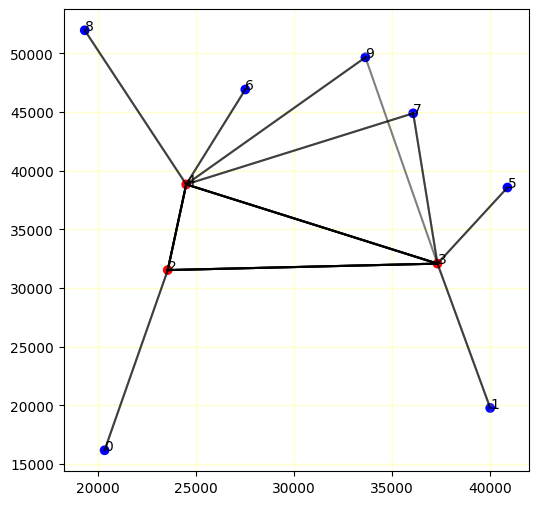

In [10]:
plot_solution(nodes_coordinates, bitmap(n, hubs), flow, point_labels='numbers', plot_all_lines=False, verbose=0)

##### Let's plot initial solution and optimal solution for several instances to observe how close is initial solution to optimal

In [11]:
from os import listdir
from os.path import isfile

In [12]:
DATASET = 'AP'
INPUT_DIRECTORY = f"./data/{DATASET}/generated/"
SOLUTIONS_FILE = '/home/ubuntu/VNS_for_UMApHMP/data/AP/Solutions-UMApHMP.txt'
NUM_OF_PROBLEMS = 100

### 1. Initial solution - "min-max edge" from the paper Robust UMApHMP

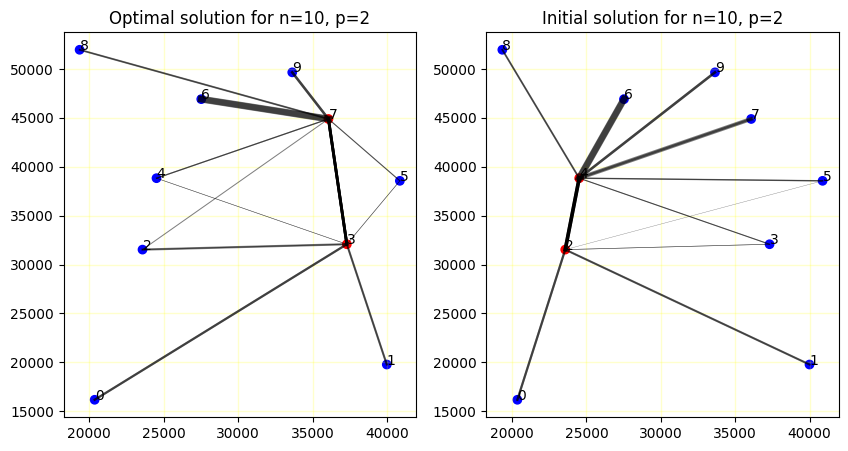

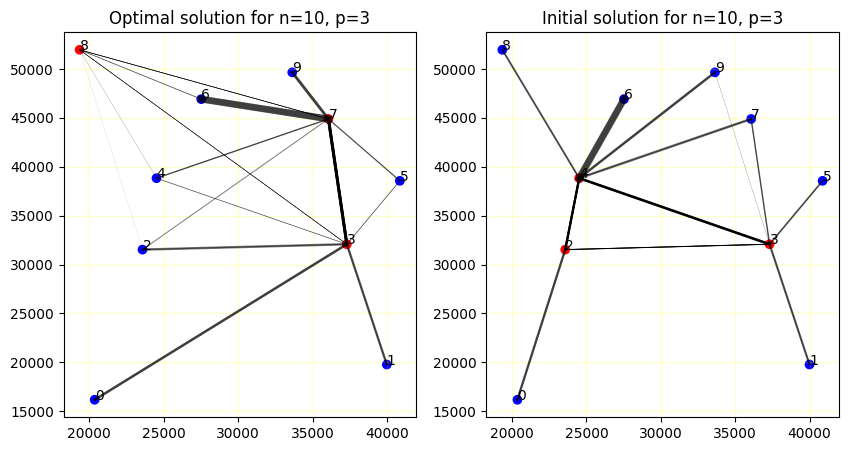

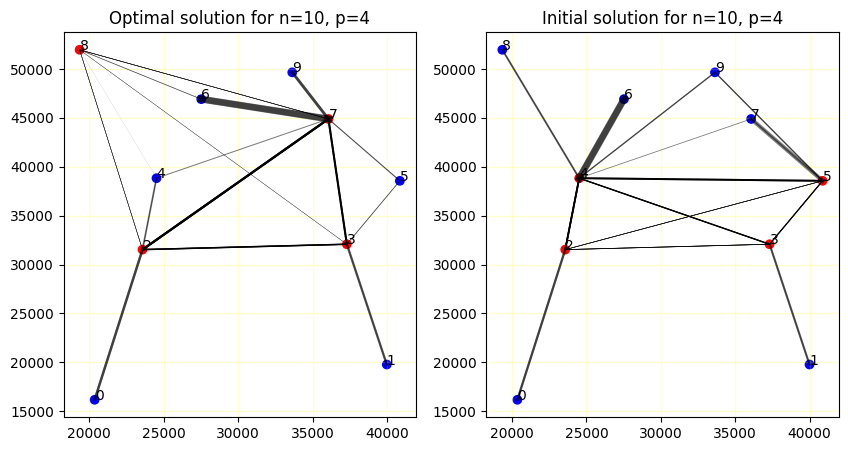

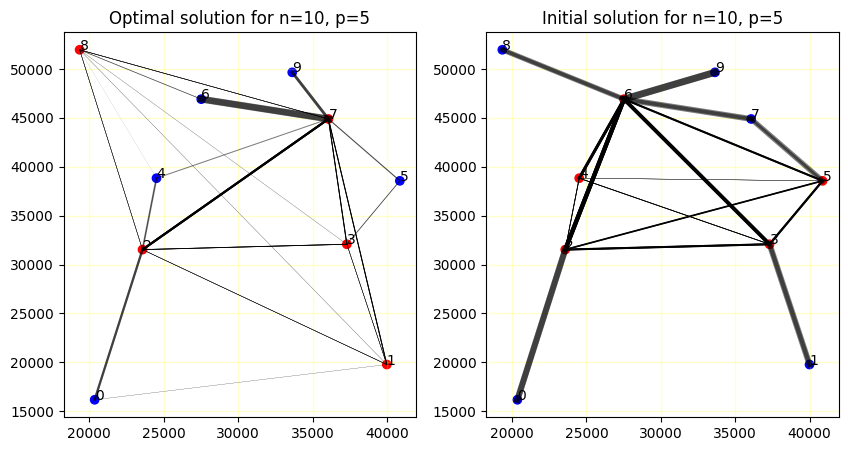

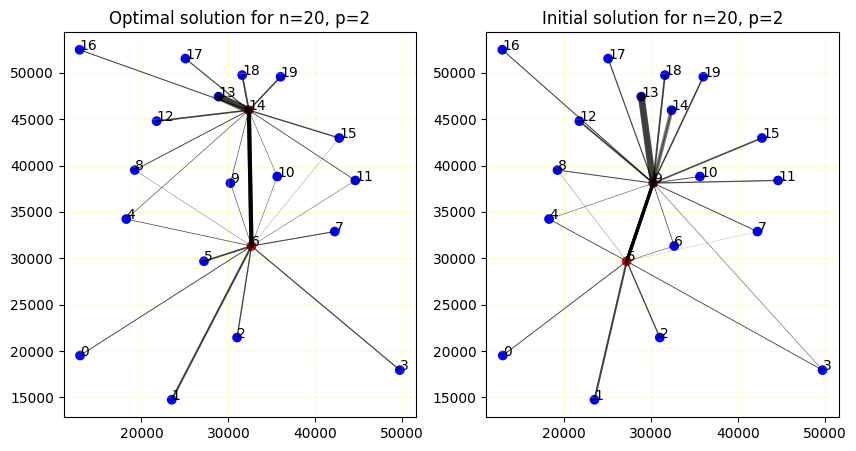

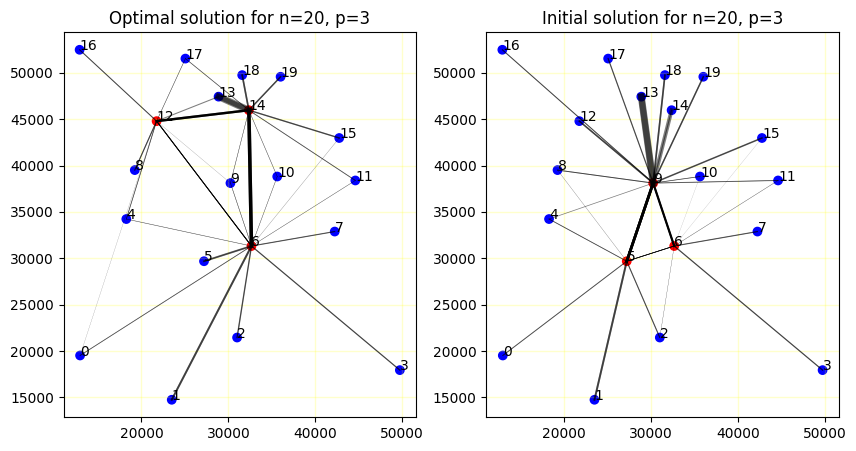

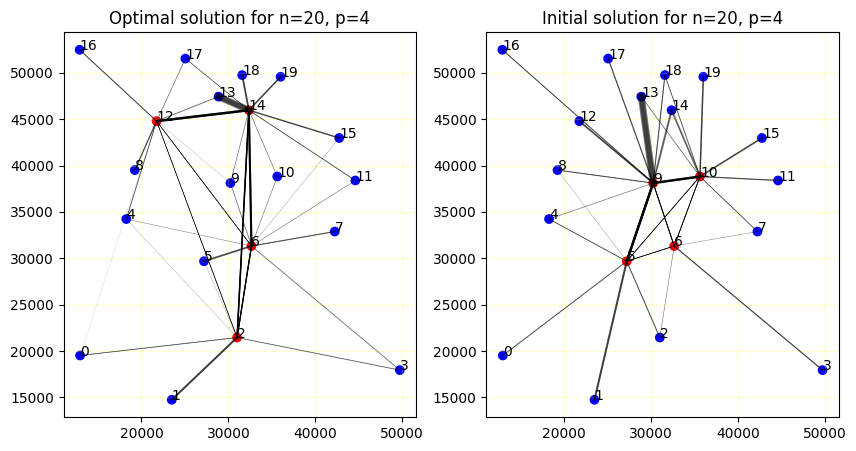

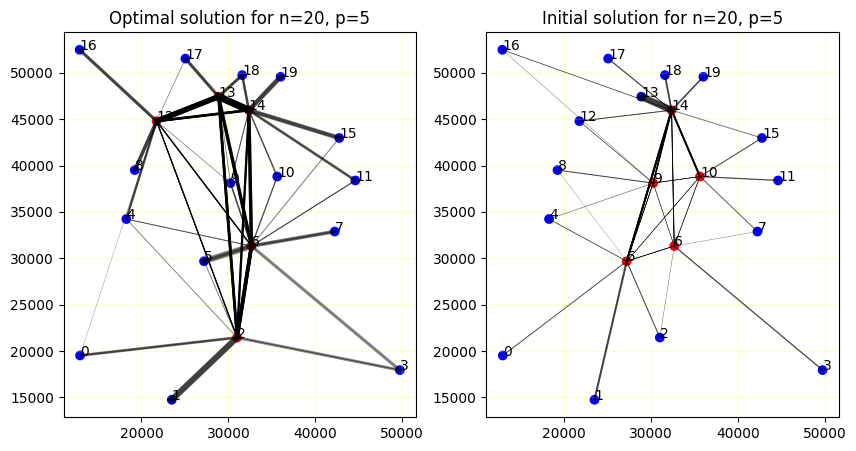

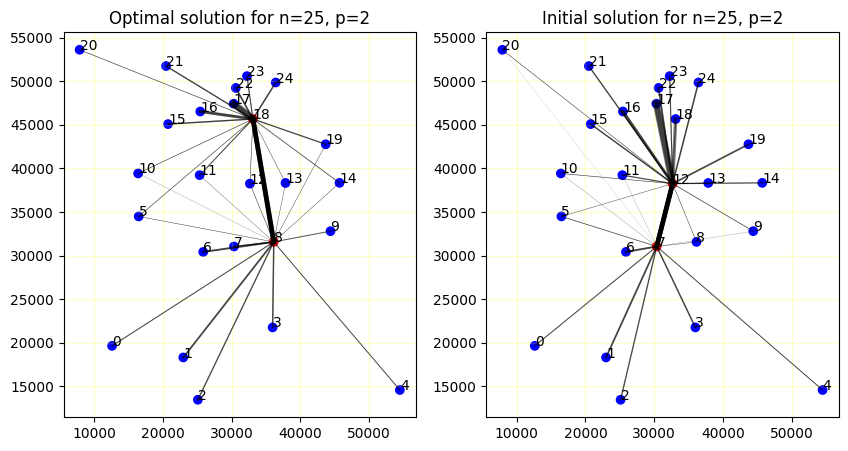

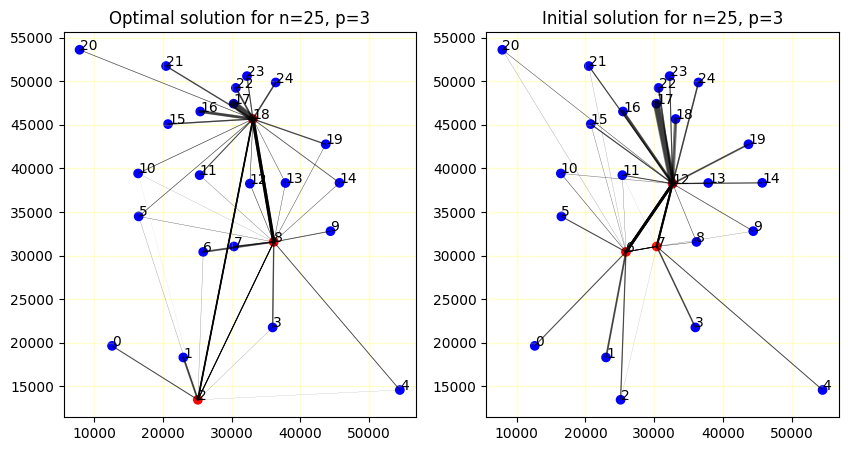

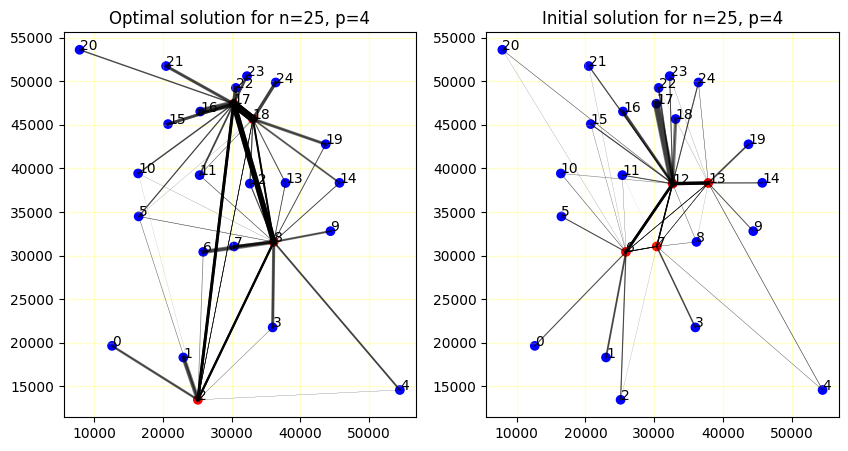

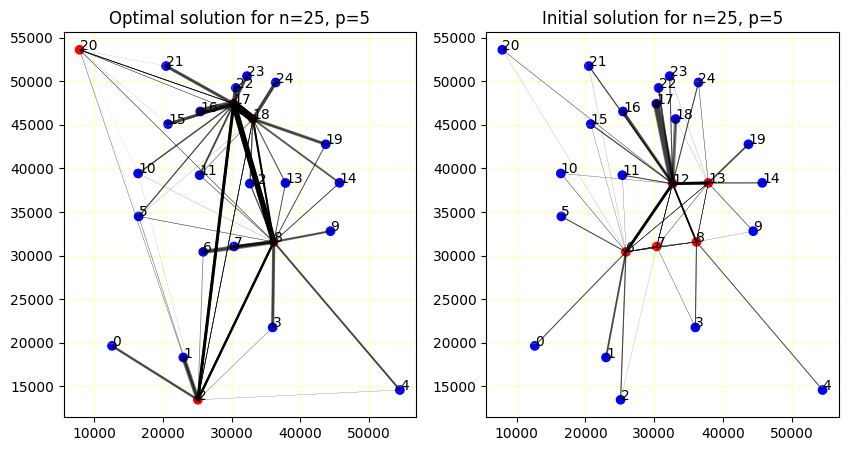

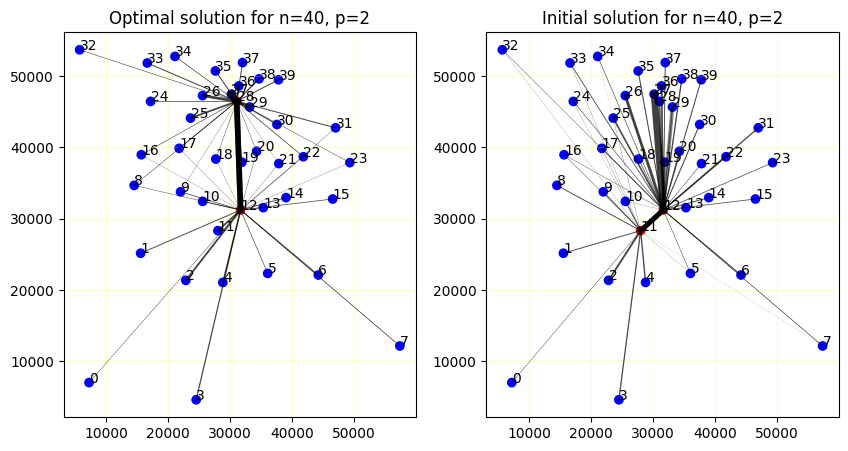

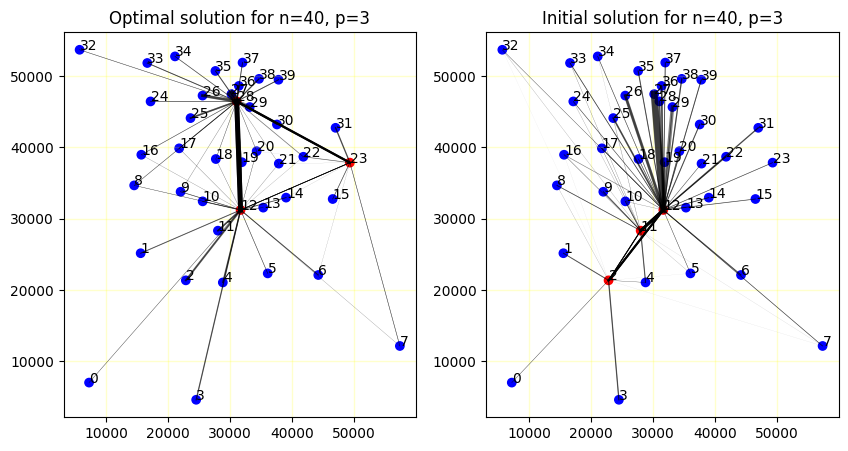

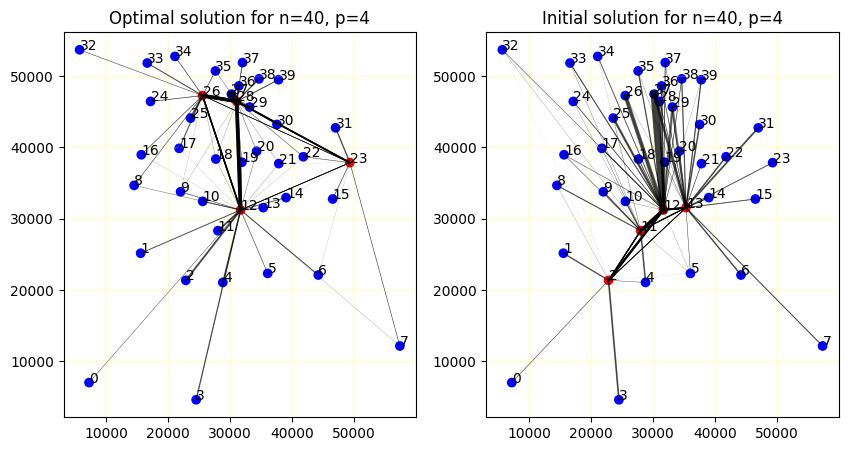

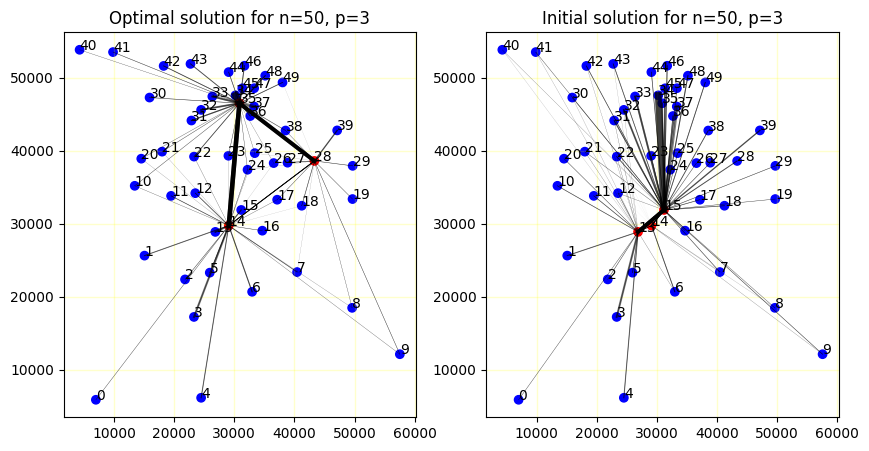

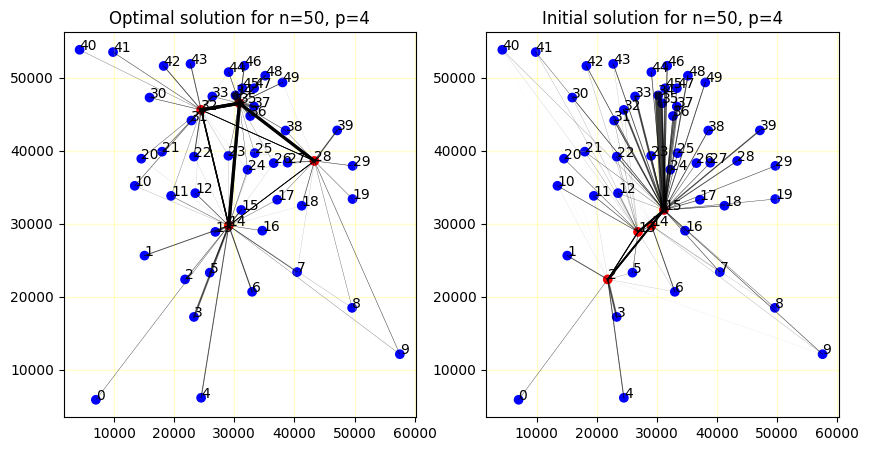

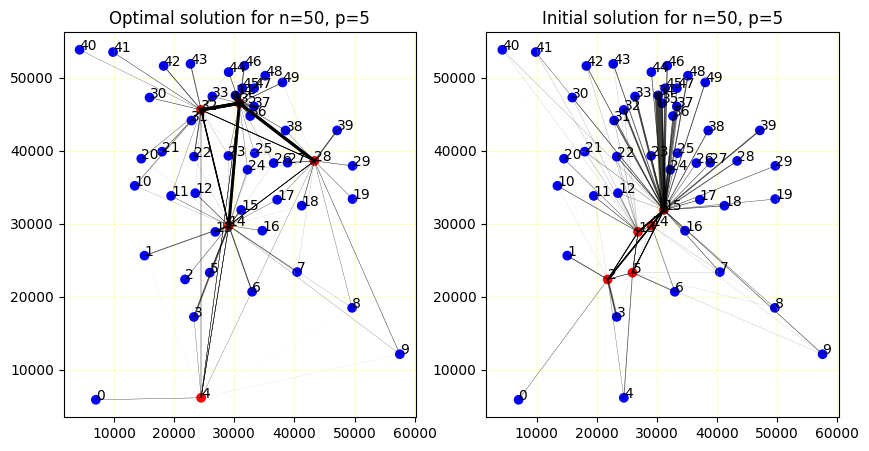

In [13]:
plot_comparison_with_optimal(INPUT_DIRECTORY, SOLUTIONS_FILE, DATASET, get_initial_solution_robust, NUM_OF_PROBLEMS)

### 2. Initial solution - random

In [14]:
from vns import get_initial_solution_random

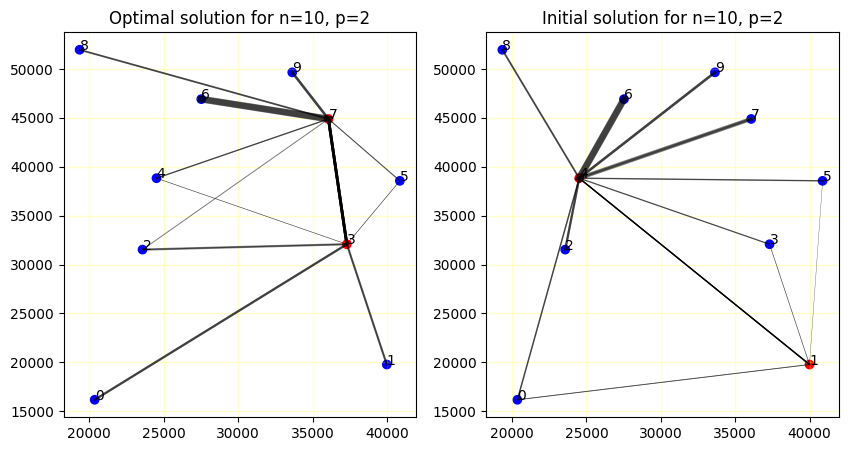

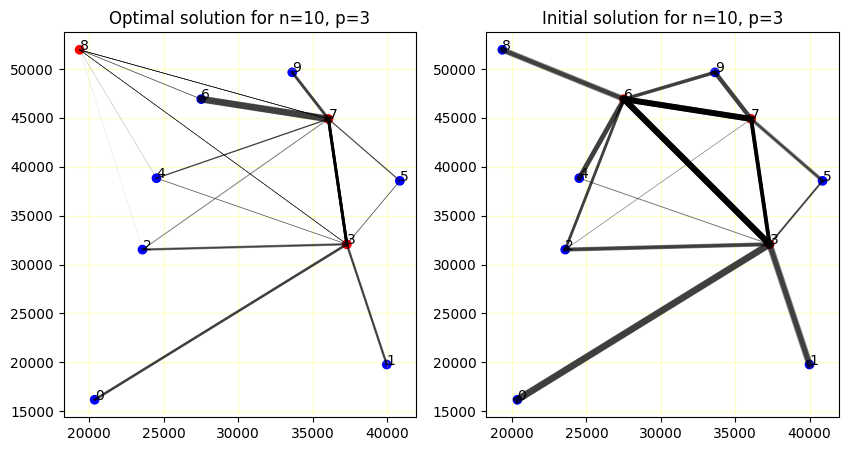

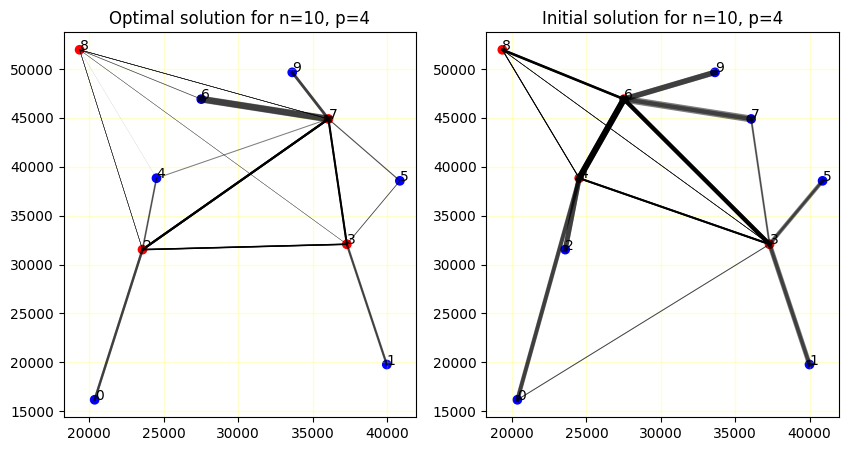

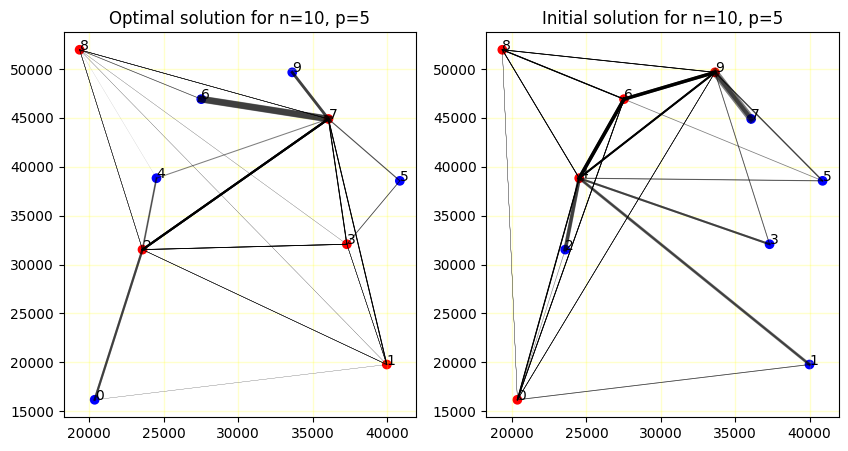

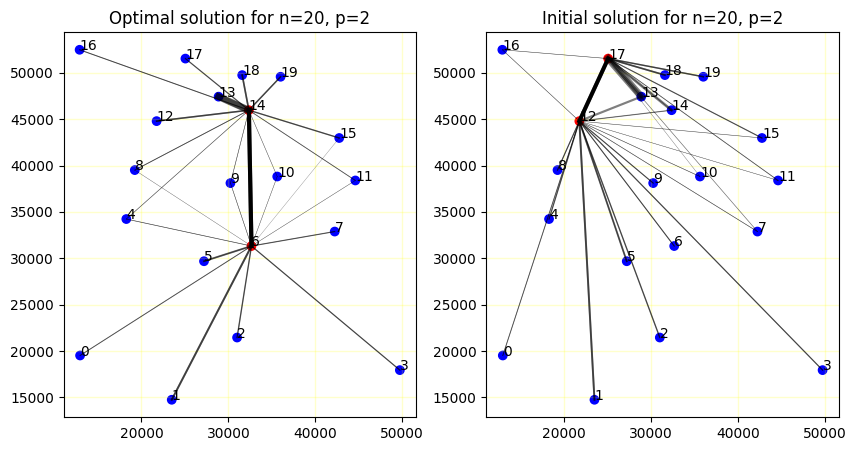

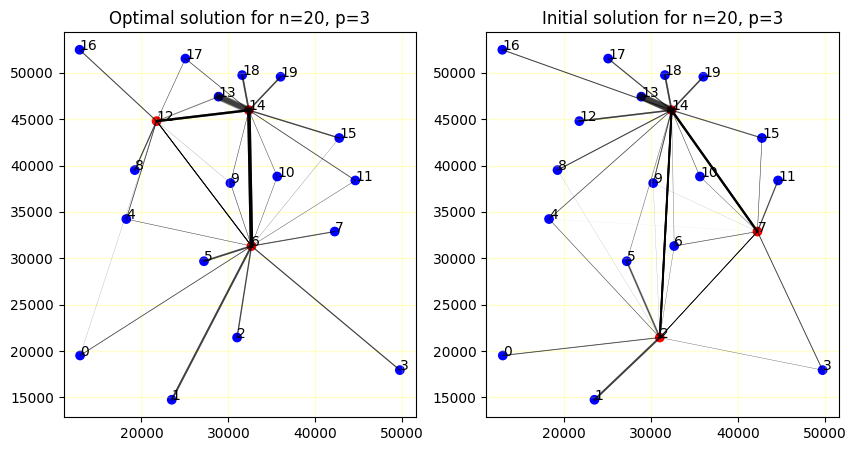

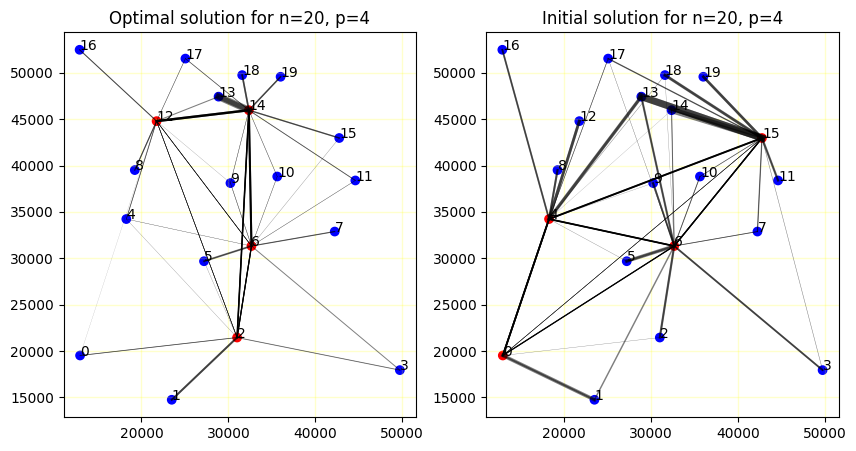

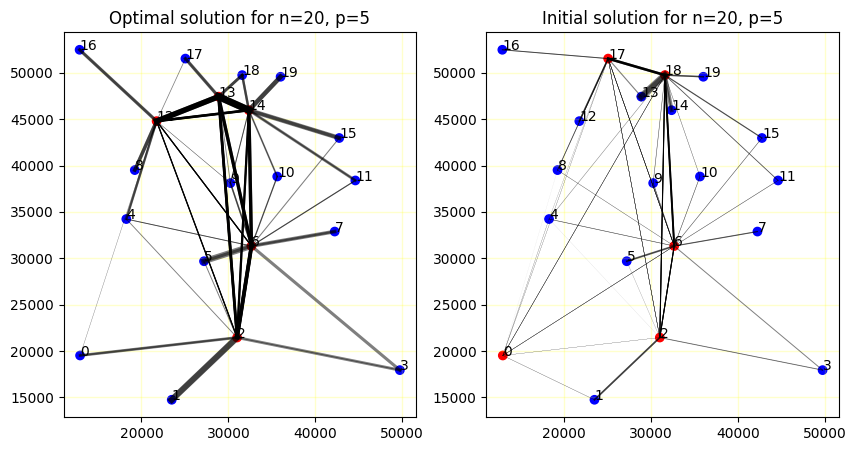

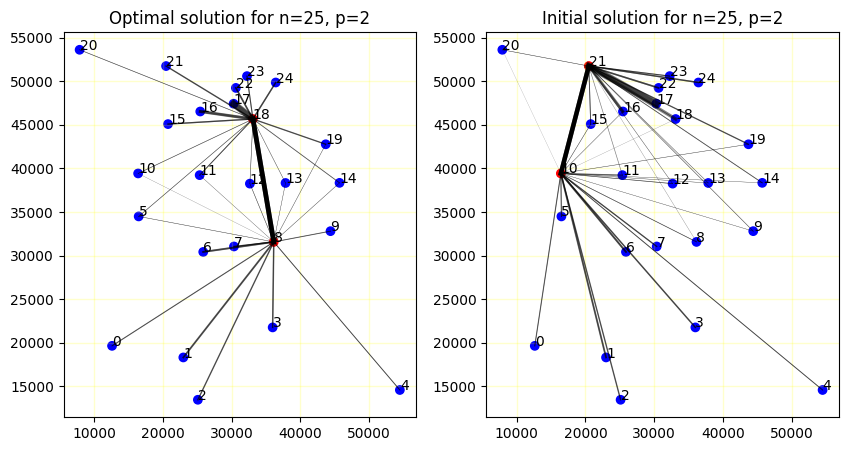

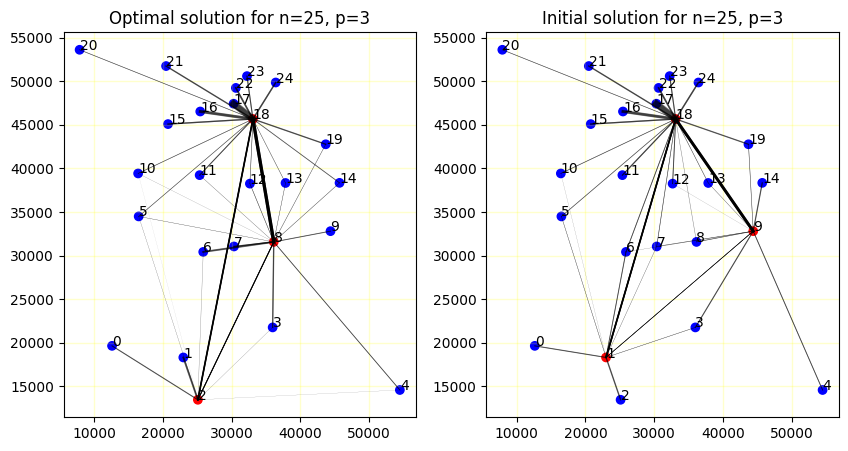

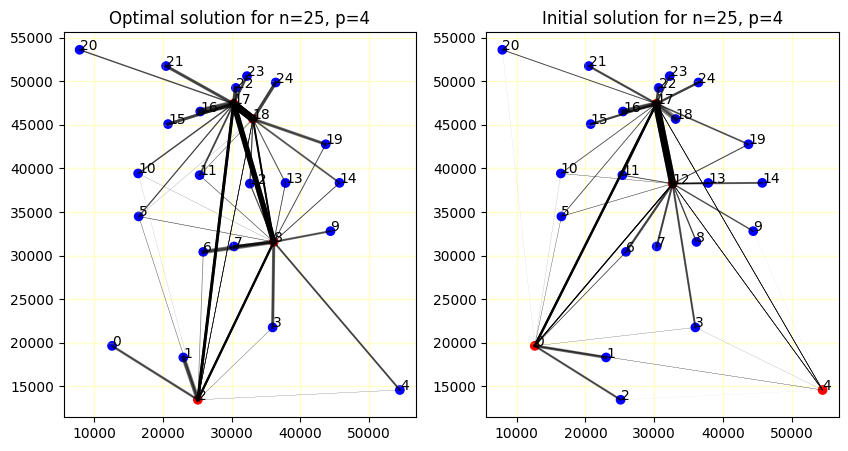

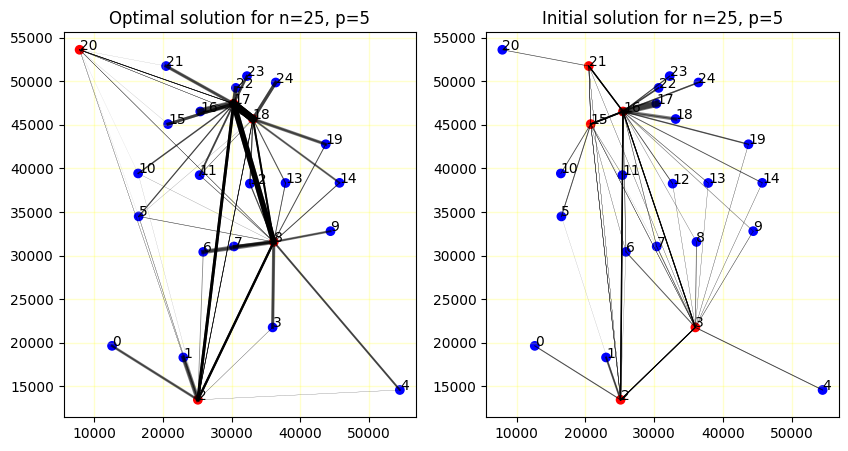

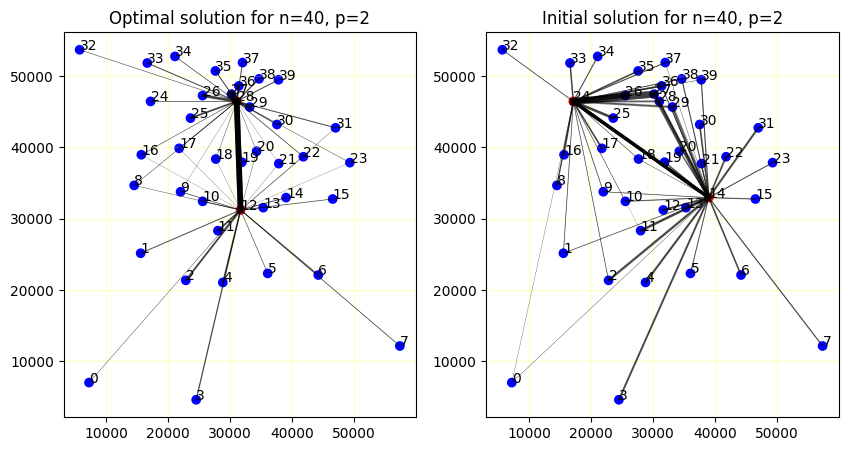

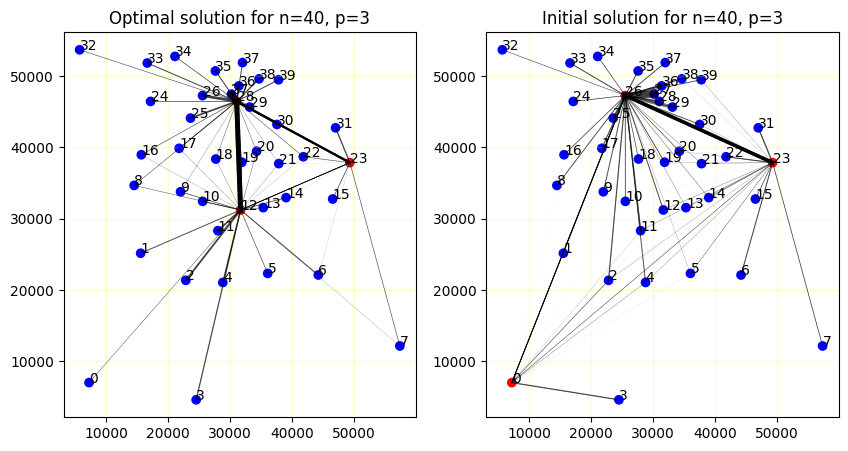

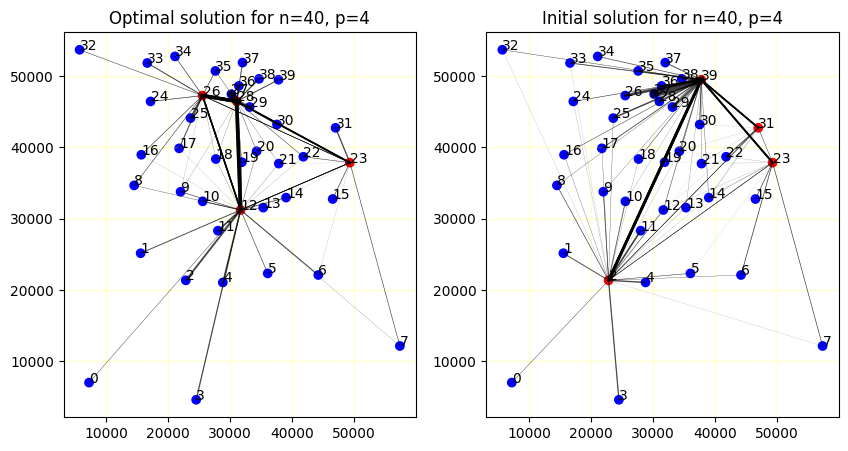

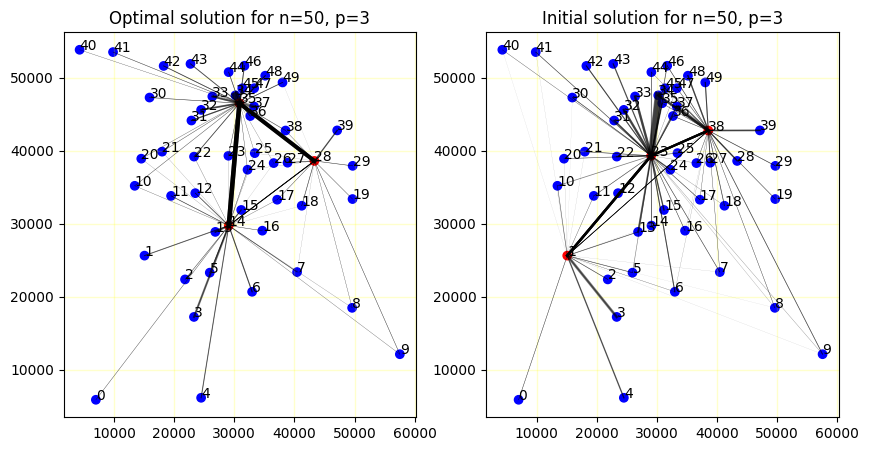

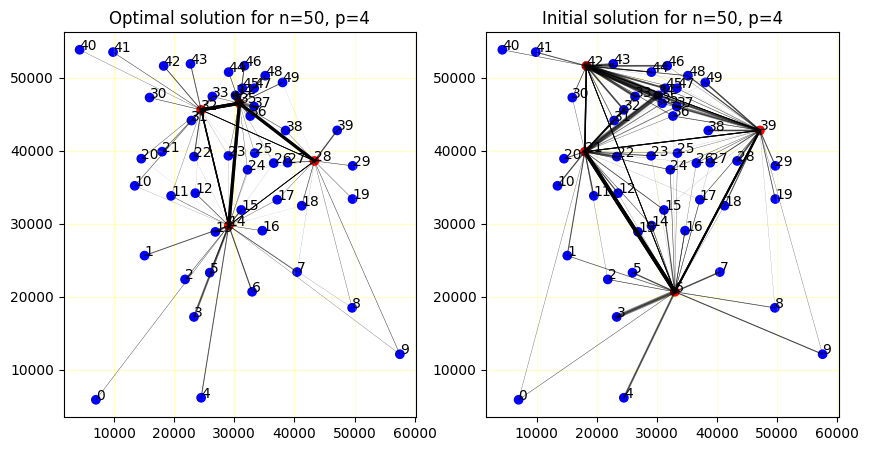

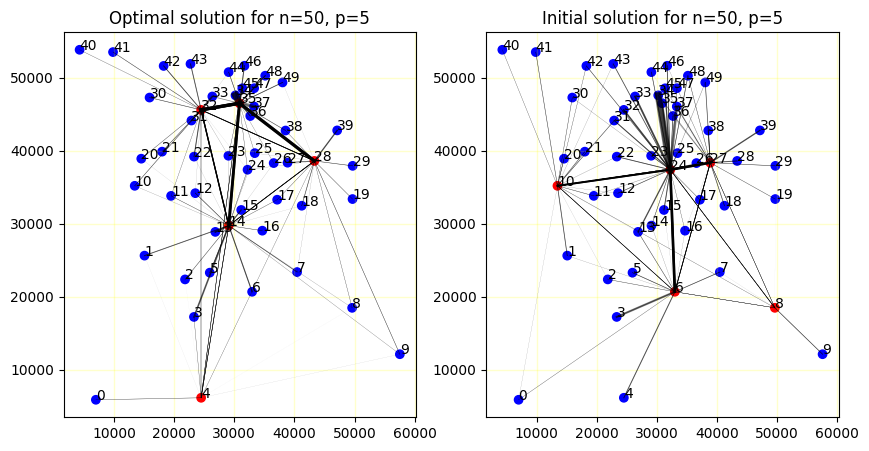

In [15]:
plot_comparison_with_optimal(INPUT_DIRECTORY, SOLUTIONS_FILE, DATASET, get_initial_solution_random, NUM_OF_PROBLEMS)

### 3. Initial solution - p angles

In [16]:
from vns import get_initial_solution_circle

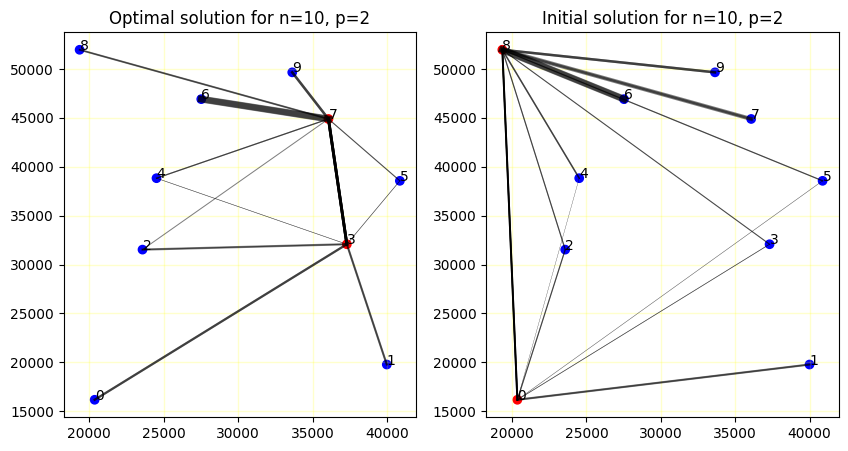

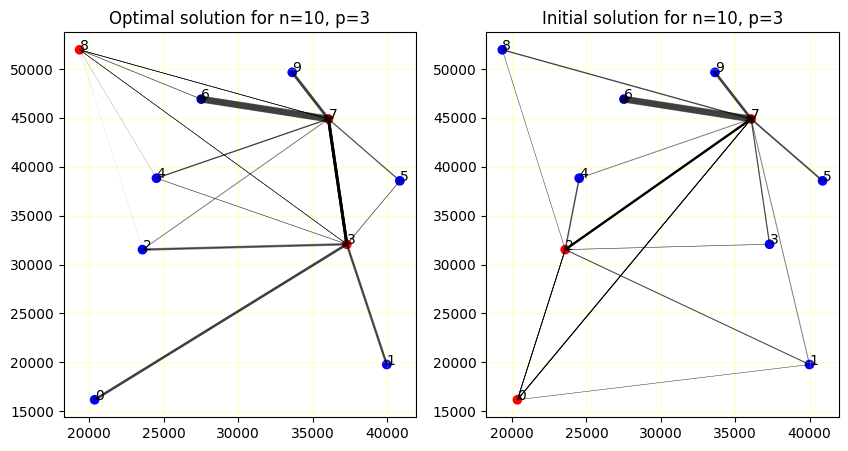

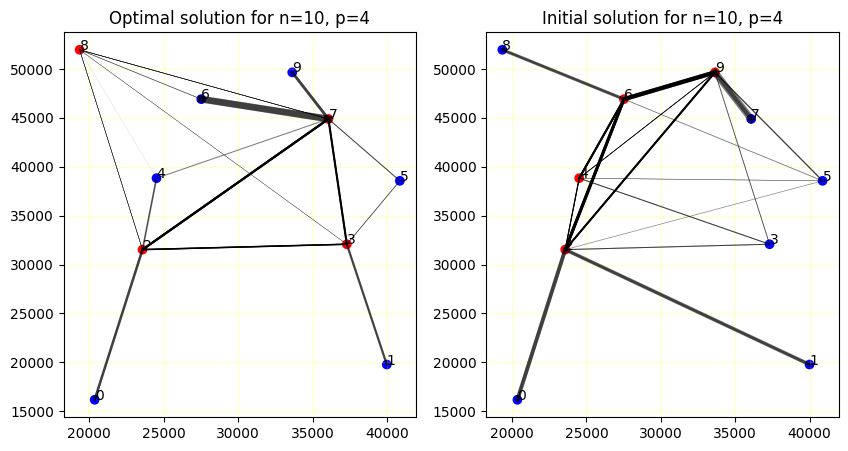

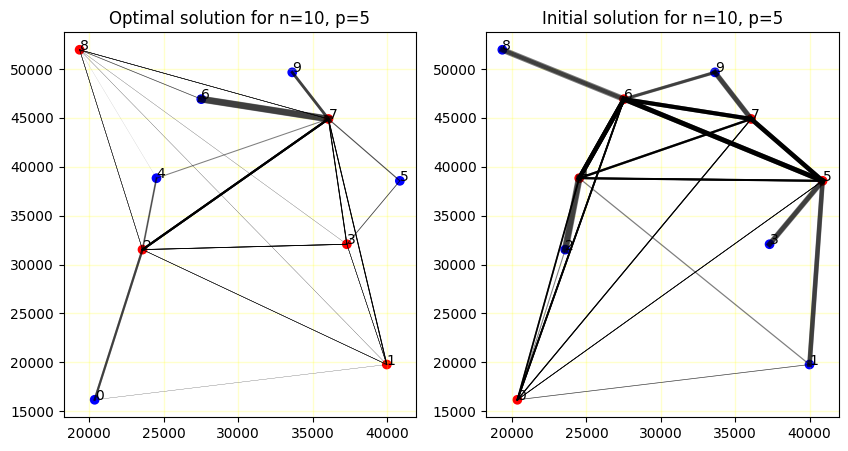

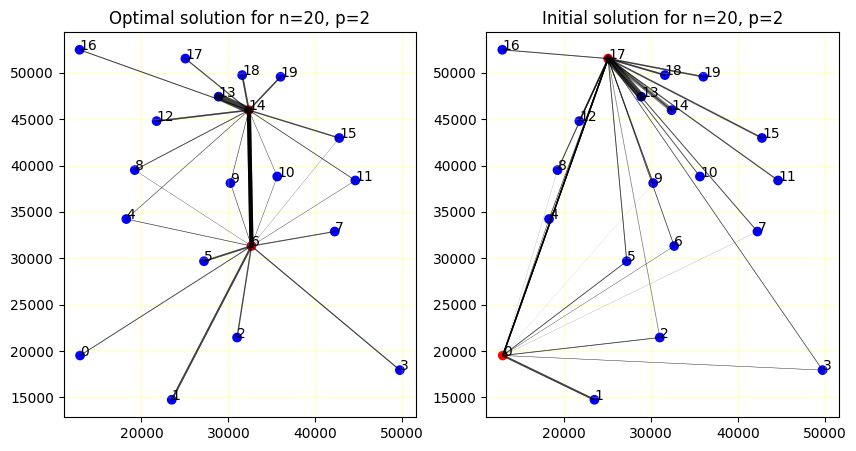

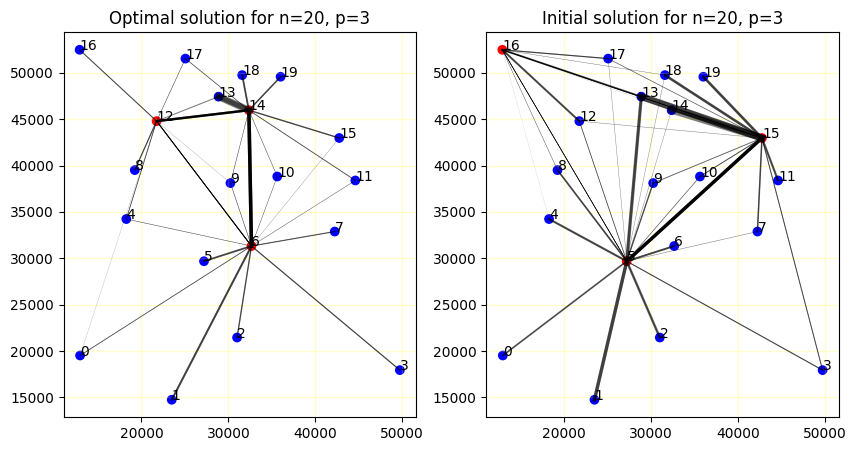

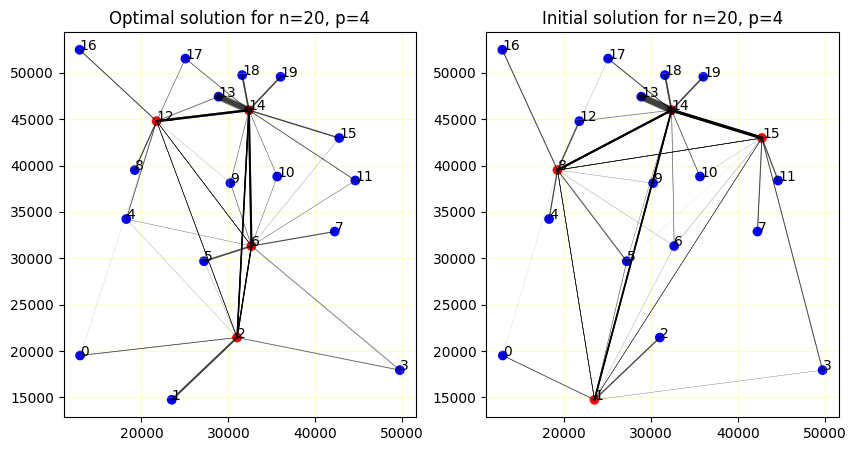

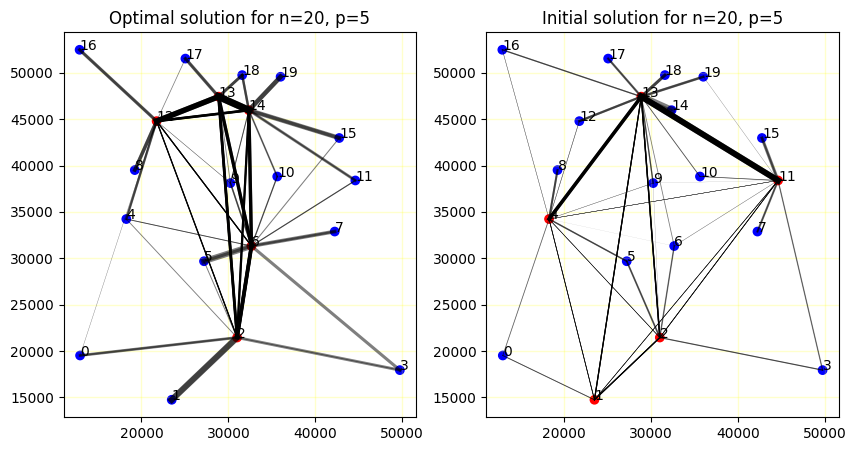

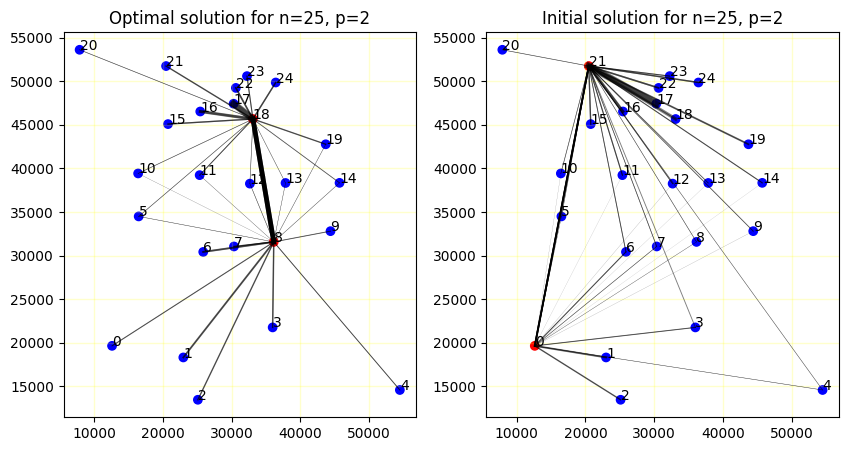

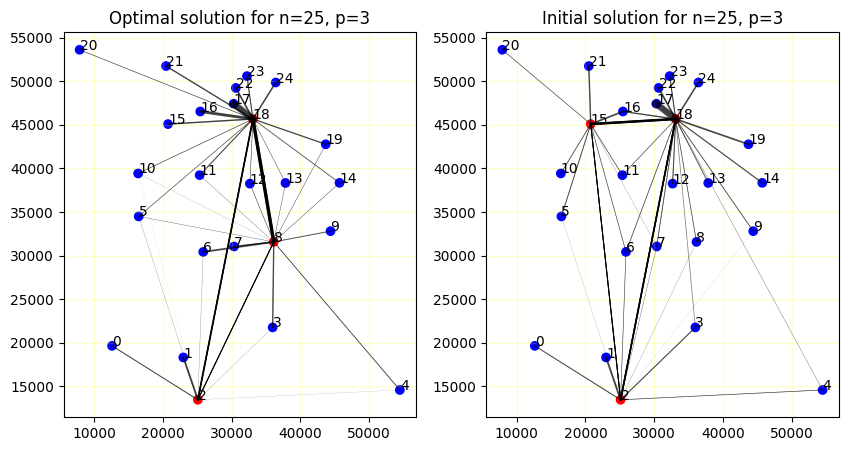

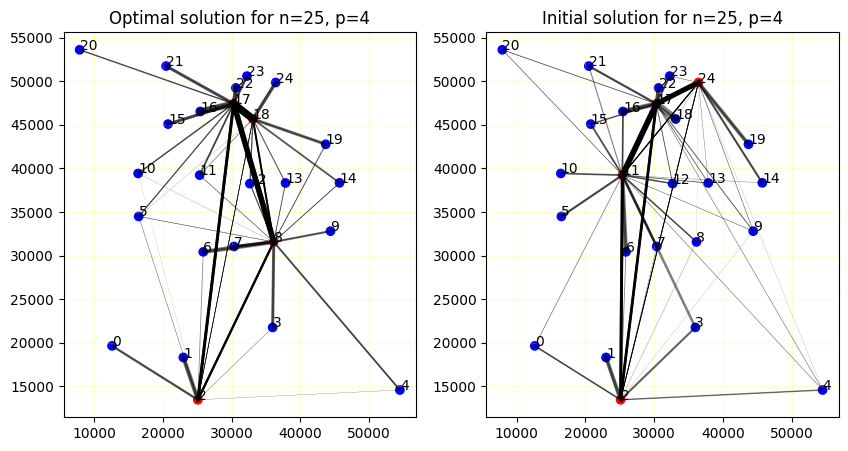

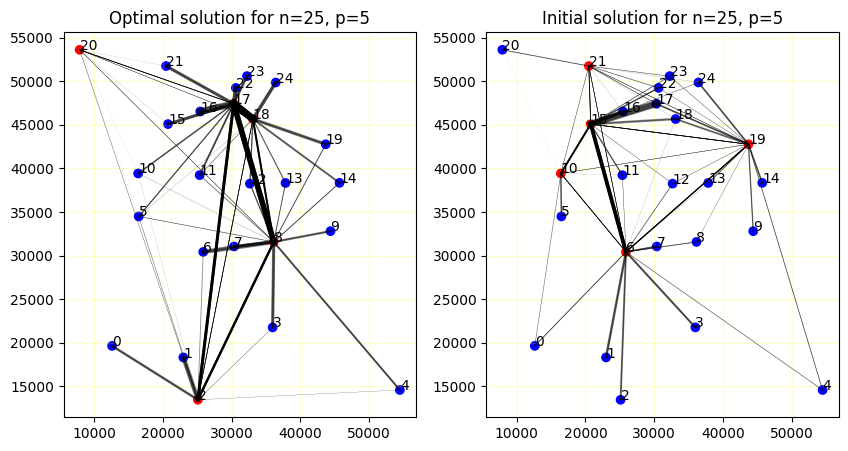

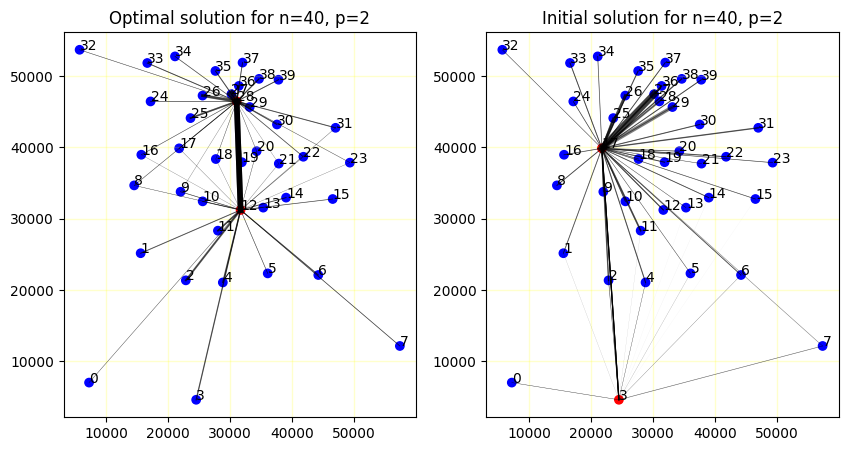

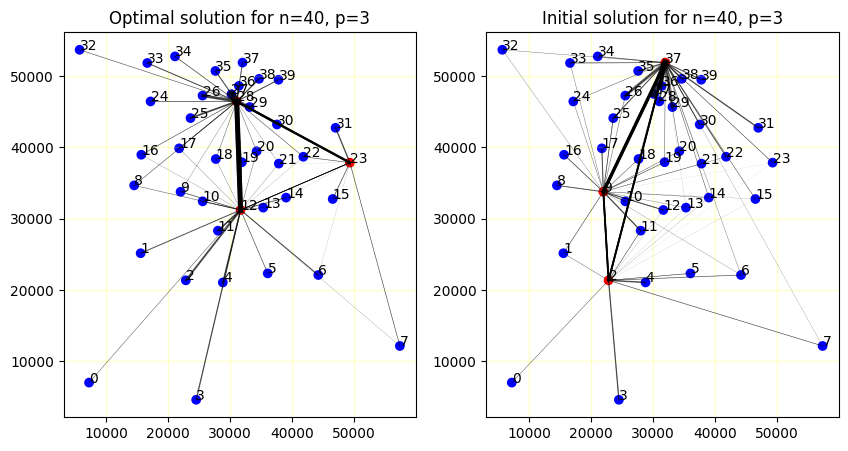

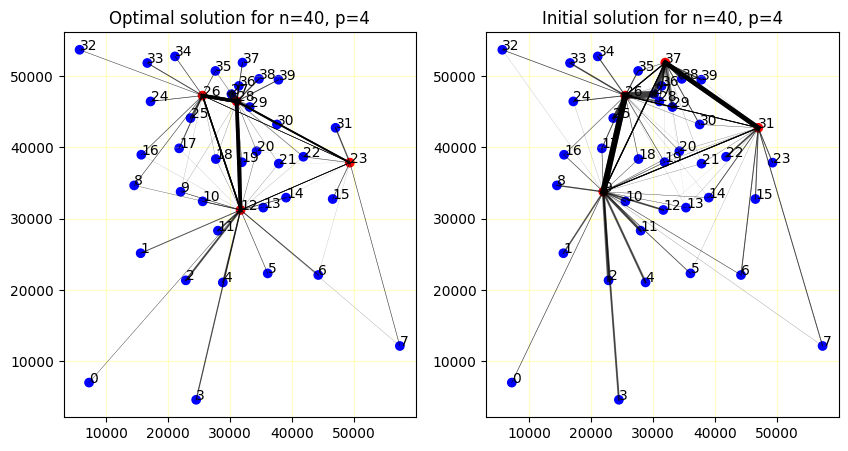

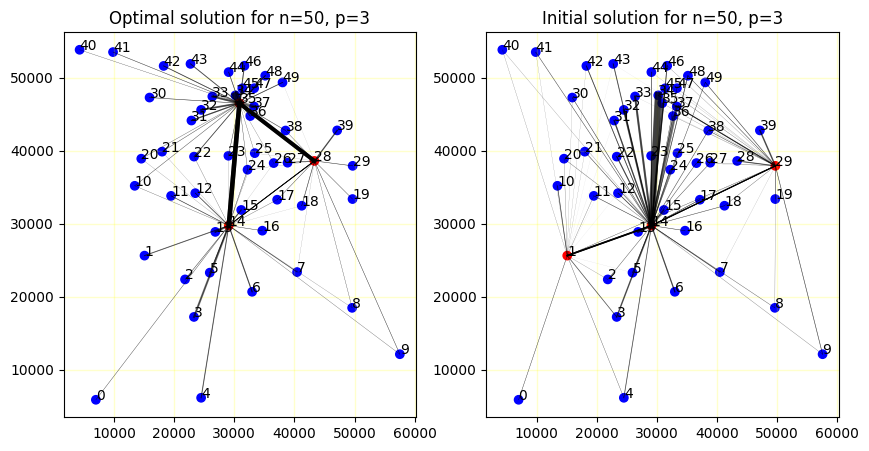

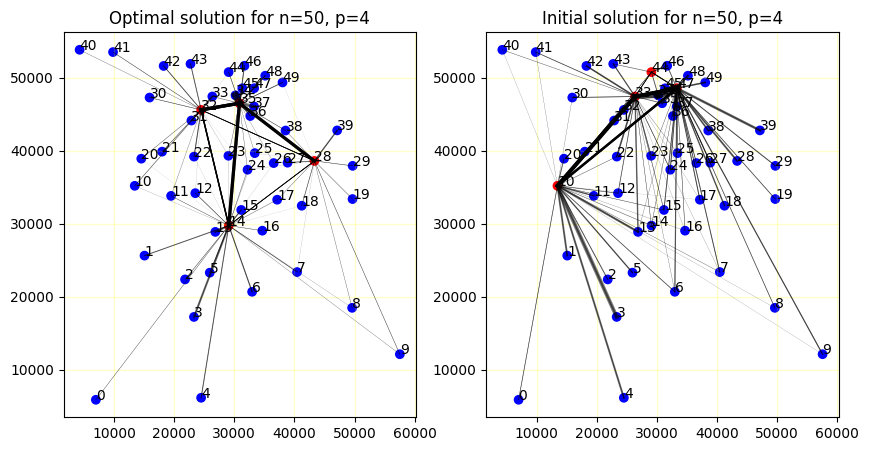

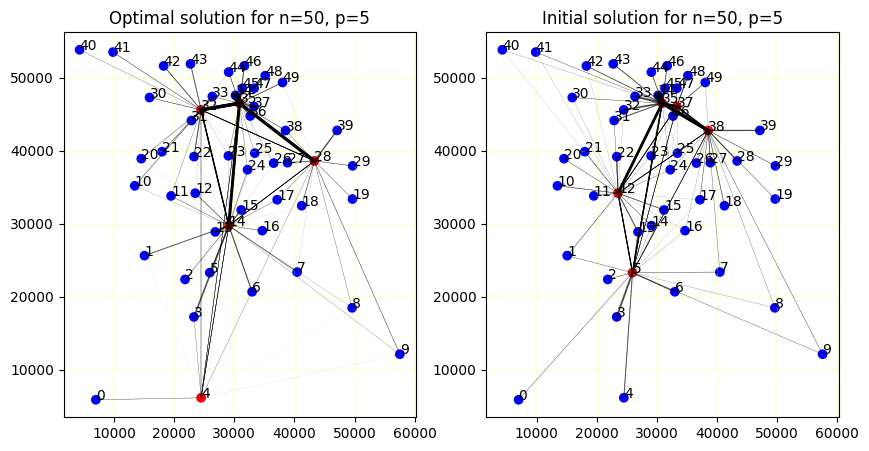

In [17]:
plot_comparison_with_optimal(INPUT_DIRECTORY, SOLUTIONS_FILE, DATASET, get_initial_solution_circle, NUM_OF_PROBLEMS)